# 영상 데이터 검색 by AutoEncoder

# 데이터 준비


<br>

데이터는 다음과 같이 구성됨

```
dogs/
    train/
        class1/
            file1.jpg
            file2.jpg
             ...
        class2/ 
            file21.jpg
            file22.jpg
             ...    
        class3/
            file31.jpg
            file32.jpg
             ...
        ...
    test/
        class1/
            file8.jpg
            file9.jpg
             ...
        class2/ 
            file28.jpg
            file29.jpg
             ...    
        class3/
            file38.jpg
            file39.jpg
             ...
        ...
    
```

In [ ]:
!rm -rf dogs_prepared.tar.gz
!wget https://github.com/dhrim/DMC_2022/raw/master/material/deep_learning/dogs_prepared.tar.gz
!ls -al  

--2022-01-27 03:16:17--  https://github.com/dhrim/DMC_2022/raw/master/material/deep_learning/dogs_prepared.tar.gz
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/DMC_2022/master/material/deep_learning/dogs_prepared.tar.gz [following]
--2022-01-27 03:16:17--  https://raw.githubusercontent.com/dhrim/DMC_2022/master/material/deep_learning/dogs_prepared.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62898132 (60M) [application/octet-stream]
Saving to: ‘dogs_prepared.tar.gz’

dogs_prepared.tar.g 100%[===================>]  59.98M   183MB/s    in 0.3s    

2022-01-27 03:16:23 (183 MB/s) 

In [ ]:
!rm -rf dogs_prepared
!tar xvfz dogs_prepared.tar.gz
!ls -al dogs_prepared

dogs_prepared/
dogs_prepared/._test
dogs_prepared/test/
dogs_prepared/train/
dogs_prepared/train/n02085620-Chihuahua/
dogs_prepared/train/n02085782-Japanese_spaniel/
dogs_prepared/train/n02085936-Maltese_dog/
dogs_prepared/train/n02086079-Pekinese/
dogs_prepared/train/n02086240-Shih-Tzu/
dogs_prepared/train/n02086646-Blenheim_spaniel/
dogs_prepared/train/n02086910-papillon/
dogs_prepared/train/n02087046-toy_terrier/
dogs_prepared/train/n02087394-Rhodesian_ridgeback/
dogs_prepared/train/n02088094-Afghan_hound/
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1003.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1007.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1023.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10263.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10715.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10822.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10832.jpg
dogs_prepared/train/n02088094-Afghan_hound/n020

# 모델 학습

In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization, Input
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array


In [ ]:
BATCH_SIZE = 64



train_data_generator = ImageDataGenerator(
      rescale = 1/255.0,
).flow_from_directory(
      "dogs_prepared/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      rescale = 1/255.0,
).flow_from_directory(
      "dogs_prepared/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

train_images = []
for i in range(len(train_data_generator)):
    batch_x, batch_y = next(train_data_generator)
    train_images.append(batch_x)

train_images = np.vstack(train_images)
print(train_images.shape)


test_images = []
for i in range(len(test_data_generator)):
    batch_x, batch_y = next(train_data_generator)
    test_images.append(batch_x)

test_images = np.vstack(test_images)
print(test_images.shape)


Found 1531 images belonging to 10 classes.
Found 388 images belonging to 10 classes.
(1531, 224, 224, 3)
(448, 224, 224, 3)


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose, BatchNormalization

input = Input(shape=(224, 224, 3))

# Encoder
x = Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding="same")(x)
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding="same")(x)
x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding="same")(x)
x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding="same")(x)
x = Conv2D(128, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding="same")(x)

x = Dense(4, name="bottle_neck")(x)

# Decoder
x = Conv2DTranspose(128, (3, 3), strides=2, activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = Conv2DTranspose(64, (3, 3), strides=2, activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = Conv2DTranspose(64, (3, 3), strides=2, activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
output = Conv2D(3, (3, 3), activation="sigmoid", padding="same")(x)

model = Model(input, output)
model.compile(optimizer="Adam", loss="mse")
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_16 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_17 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 224, 224, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 32)     0   

Epoch 1/300
22/22 [==============================] - 7s 218ms/step - loss: 0.0573 - val_loss: 0.0671
Epoch 2/300
22/22 [==============================] - 4s 196ms/step - loss: 0.0273 - val_loss: 0.0706
Epoch 3/300
22/22 [==============================] - 4s 194ms/step - loss: 0.0231 - val_loss: 0.0696
Epoch 4/300
22/22 [==============================] - 4s 194ms/step - loss: 0.0208 - val_loss: 0.0689
Epoch 5/300
22/22 [==============================] - 4s 194ms/step - loss: 0.0197 - val_loss: 0.0687
Epoch 6/300
22/22 [==============================] - 4s 195ms/step - loss: 0.0191 - val_loss: 0.0669
Epoch 7/300
22/22 [==============================] - 4s 195ms/step - loss: 0.0189 - val_loss: 0.0627
Epoch 8/300
22/22 [==============================] - 4s 195ms/step - loss: 0.0183 - val_loss: 0.0644
Epoch 9/300
22/22 [==============================] - 4s 195ms/step - loss: 0.0184 - val_loss: 0.0564
Epoch 10/300
22/22 [==============================] - 4s 194ms/step - loss: 0.0180 - val_lo

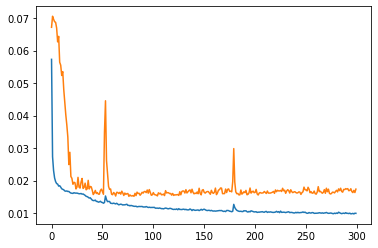

In [ ]:

history = model.fit(train_images, train_images, epochs=300, batch_size=BATCH_SIZE, validation_split=0.1)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



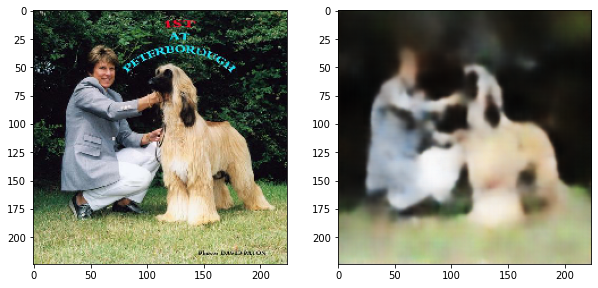

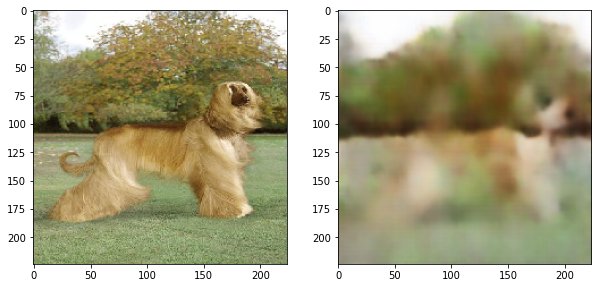

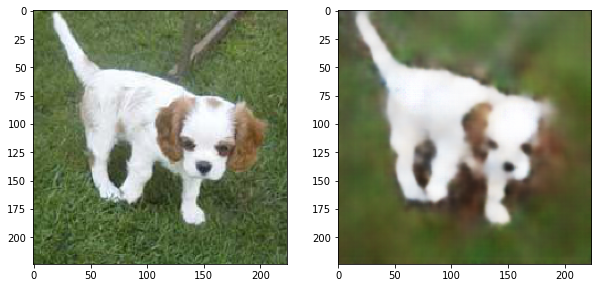

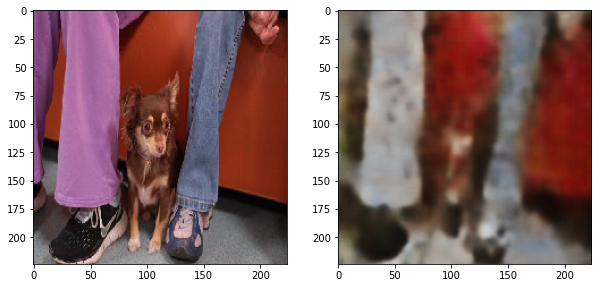

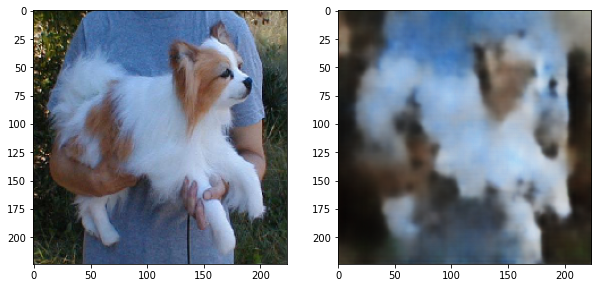

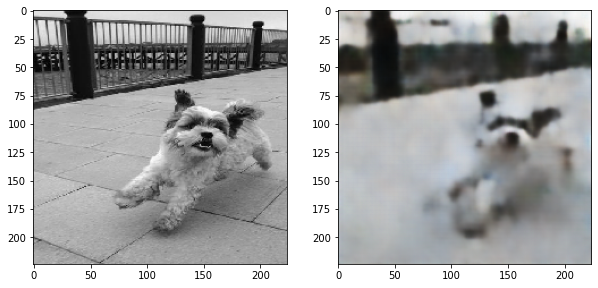

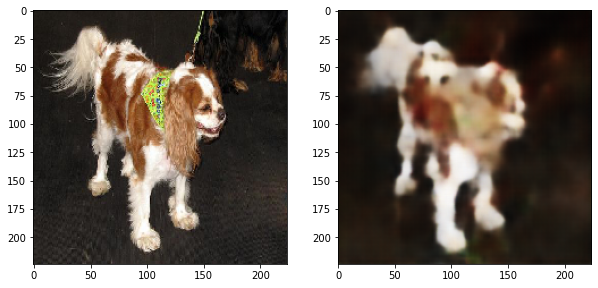

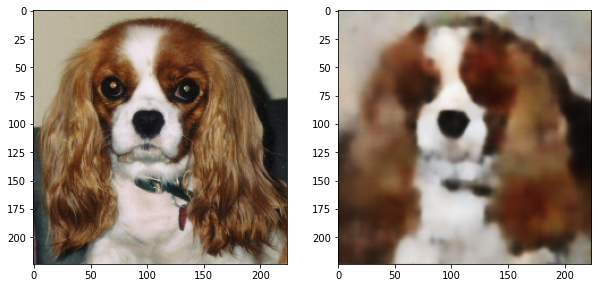

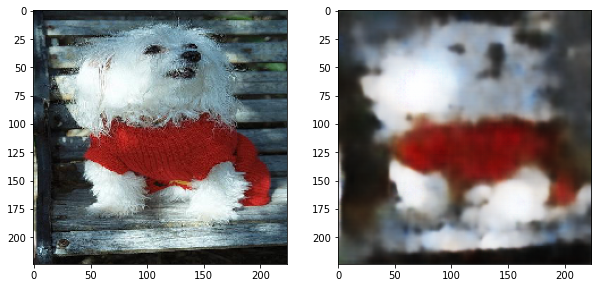

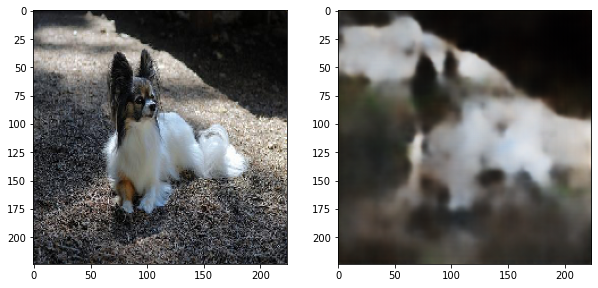

In [ ]:
reconstructed = model.predict(train_images[:16])
for i in range(5):
    plt.figure(figsize=(10,5))  
    plt.subplot(121)
    plt.imshow(train_images[i])
    plt.subplot(122)
    plt.imshow(reconstructed[i])
    plt.show()

reconstructed = model.predict(test_images[:16])
for i in range(5):
    plt.figure(figsize=(10,5))  
    plt.subplot(121)
    plt.imshow(test_images[i])
    plt.subplot(122)
    plt.imshow(reconstructed[i])
    plt.show()



# 인코딩

In [ ]:
encoder = Model(inputs=model.input, outputs=model.get_layer("bottle_neck").output)

images = []
codes = []
for i in range(len(train_data_generator)):
    batch_x, batch_y = next(train_data_generator)
    encoded = encoder(batch_x)
    images.extend(batch_x)
    codes.extend(encoded)

images = np.array(images)
codes = np.array(codes)

print(images.shape)
print(codes.shape)

(1531, 224, 224, 3)
(1531, 7, 7, 4)


In [ ]:
codes = codes.reshape((-1, 7*7*4))

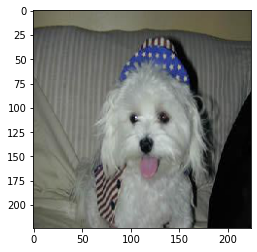

In [ ]:
batch_x, batch_y = next(test_data_generator)

I = 2
target_image = batch_x[I]
target_code = encoder.predict(batch_x).reshape((-1, 7*7*4))[I]

plt.imshow(target_image)
plt.show()

# 가까운 영상 찾기

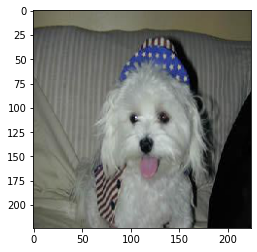

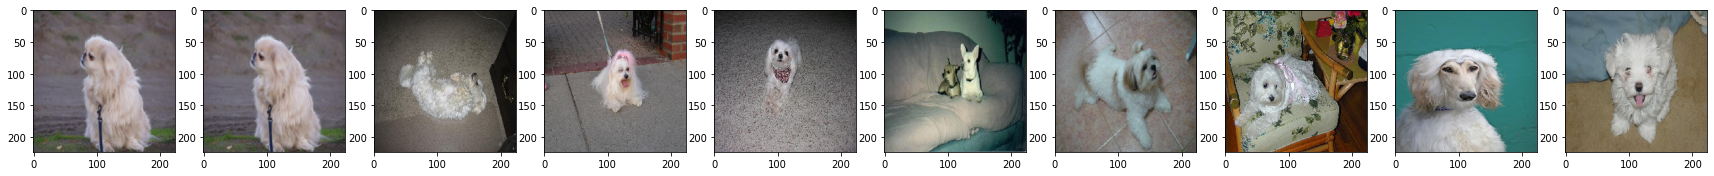

In [ ]:
from scipy.spatial import distance

distances = [distance.euclidean(target_code, code) for code in codes]
similar_index = np.argsort(distances)

plt.imshow(target_image)
plt.show()
n = 10
plt.figure(figsize=(30,3))
for i in range(1,n+1):
    plt.subplot(1,n,i)
    plt.imshow(images[similar_index[i]])
plt.show()
